In [1]:
import numpy as np # linear algebra
import os
import re
import sys
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import time
import datetime
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

from sklearn import metrics

In [2]:
os.chdir('C:/Users/ybyad/Desktop/Mynewpr')

In [3]:
data=pd.read_csv('googleplaystore.csv')

In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
data['Rating'] = data['Rating'].fillna(data['Rating'].median())


In [6]:
data.dropna(inplace = True)

In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

In [10]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install chart_studio

In [12]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [13]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [14]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

Text(0.5, 1.0, 'Number of Apps in each category')

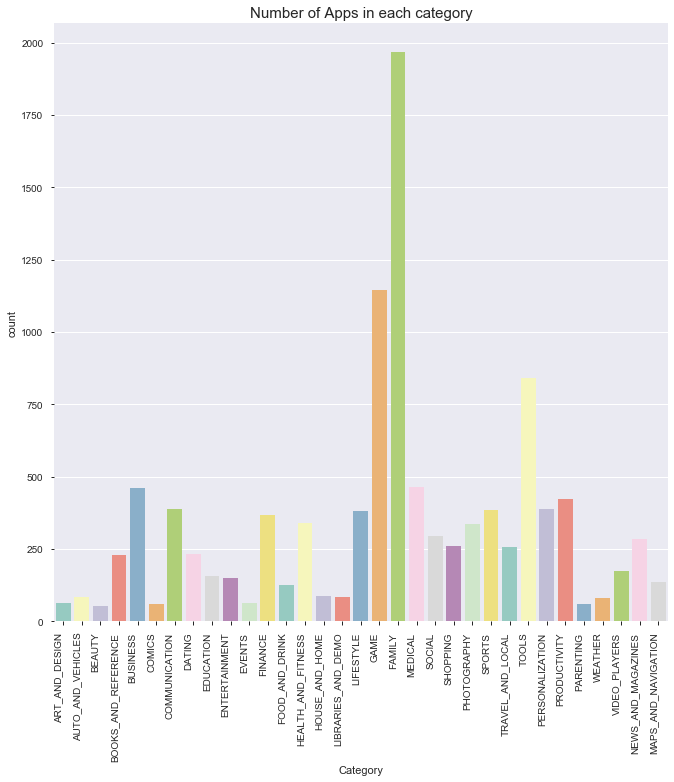

In [15]:
rcParams['figure.figsize'] = 11,11
cat_cnt = sns.countplot(x="Category",data=data, palette = "Set3")
cat_cnt.set_xticklabels(cat_cnt.get_xticklabels(), rotation=90, ha="right")
cat_cnt
plt.title('Number of Apps in each category',size = 15)

In [16]:
data.drop(data[(data['Category'] == 'HOUSE_AND_HOME')].index, inplace=True)
data.drop(data[(data['Category'] == 'AUTO_AND_VEHICLES')].index, inplace=True)
data.drop(data[(data['Category'] == 'LIBRARIES_AND_DEMO')].index, inplace=True)
data.drop(data[(data['Category'] == 'NEWS_AND_MAGAZINES')].index, inplace=True)
data.drop(data[(data['Category'] == 'TRAVEL_AND_LOCAL')].index, inplace=True)
data.drop(data[(data['Category'] == 'BOOKS_AND_REFERENCE')].index, inplace=True)
data.drop(data[(data['Category'] == 'ART_AND_DESIGN')].index, inplace=True)
data.drop(data[(data['Category'] == 'HEALTH_AND_FITNESS')].index, inplace=True)
data.drop(data[(data['Category'] == 'MEDICAL')].index, inplace=True)
data.drop(data[(data['Category'] == 'DATING')].index, inplace=True)
data.drop(data[(data['Category'] == 'WEATHER')].index, inplace=True)
data.drop(data[(data['Category'] == 'EVENTS')].index, inplace=True)
data.drop(data[(data['Category'] == 'BEAUTY')].index, inplace=True)
data.drop(data[(data['Category'] == 'COMICS')].index, inplace=True)
data.drop(data[(data['Category'] == 'MAPS_AND_NAVIGATION')].index, inplace=True)
data.drop(data[(data['Category'] == 'PARENTING')].index, inplace=True)
data.drop(data[(data['Category'] == 'FOOD_AND_DRINK')].index, inplace=True)
data.drop(data[(data['Category'] == 'EDUCATION')].index, inplace=True)
data.drop(data[(data['Category'] == 'LIFESTYLE')].index, inplace=True)

Text(0.5, 1.0, 'Number of Apps in each category')

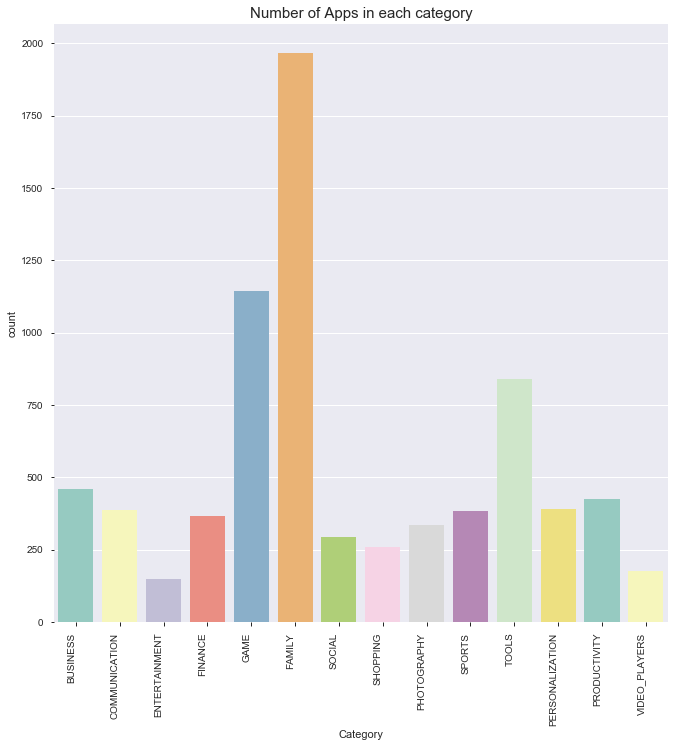

In [17]:
rcParams['figure.figsize'] = 11,11
cat_cnt = sns.countplot(x="Category",data=data, palette = "Set3")
cat_cnt.set_xticklabels(cat_cnt.get_xticklabels(), rotation=90, ha="right")
cat_cnt
plt.title('Number of Apps in each category',size = 15)

In [18]:
data['Reviews'] = data['Reviews'].astype(int)

In [19]:
data['Rating'] = data['Rating'].astype(str).astype(float)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))

In [20]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

In [21]:
no_reviews = data.groupby('Category', as_index=False)['Reviews'].sum()
most_space = data.groupby('Category', as_index=False)['Size'].sum().sort_values(by='Size', ascending=False)

best_cat = data.groupby('Category', as_index=False)['Installs'].sum()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [23]:
#correlation
relate = data.corr()

In [24]:
import plotly.graph_objs as go

trace = go.Heatmap(z=[relate.Rating.values.tolist(), relate.Reviews.values.tolist(), relate.Size.values.tolist(), relate.Installs.values.tolist(), relate.Price.values.tolist()],
                   x=[relate.columns[0], relate.columns[1], relate.columns[2], relate.columns[3], relate.columns[4]],
                   y=[relate.columns[0], relate.columns[1], relate.columns[2], relate.columns[3], relate.columns[4]])
data_cor=[trace]
py.iplot(data_cor, filename='corr-heatmap')

In [25]:
avg_rate = data.groupby('Category', as_index=False)['Rating'].mean()

In [26]:
avg_rate_data = [go.Histogram(
        x = data.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating:', np.mean(data['Rating']))
py.offline.iplot(avg_rate_data, filename='rating_dist')

Average app rating: 4.206769596199435


In [27]:
def box_plot(datas):
    traces = []
    a = avg_rate['Category'].tolist()
    for i in range(33):
        y = np.array(datas[datas['Category'] == a[i]].Rating)
        trace = go.Box(
                    y=y,
                    name = a[i]
                )
        traces.append(trace)
    layout = go.Layout(
    title='',
    xaxis=dict(
        title='',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        
        )
    )
)    
    data_avg_rating = traces
    fig = go.Figure(data=data_avg_rating, layout=layout)
    plot_url = py.iplot(fig, filename='avg_rating-plot')


In [28]:
#Category with the Most Reviews, Most Space Consumption and Most Installations
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

data_pie = [go.Pie(
        labels = no_reviews['Category'].tolist(),
        values = no_reviews['Reviews'].tolist(),
        hoverinfo = 'label+value',
        name= 'Reviews by Category'
    
)]

py.offline.iplot(data_pie, filename='active_category')

data_size_pie = [go.Pie(
        labels = most_space['Category'].tolist(),
        values = most_space['Size'].tolist(),
        hoverinfo = 'label+value',
        name = 'x'
    
)]

py.offline.iplot(data_size_pie, filename='active_category')

data_cat_pie = [go.Pie(
        labels = best_cat['Category'].tolist(),
        values = best_cat['Installs'].tolist(),
        hoverinfo = 'label+value',
        name='y'
    
)]

py.offline.iplot(data_cat_pie, filename='active_category')

In [29]:
d1=data[data['Type']=='Free']
d2=data[data['Type']=='Paid']

In [30]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\ybyad\appdata\local\continuum\anaconda3\lib\site-packages (4.5.2)
Note: you may need to restart the kernel to use updated packages.


In [31]:
#conda install -c plotly chart-studio

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [33]:
col='year_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"app udated or added over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [34]:
col='month_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [35]:
col='month_added'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid", marker=dict())
layout={'title':"Paid App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [36]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [37]:


col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Content Rating ",'xaxis':{'title':"Contents"}}
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [38]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [39]:
col='Android Ver'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Android Versions"}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [40]:
col='Installs'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Installed App ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [41]:
#By ovserving the above plot highest installs of the apps are crossing the 1M than 10M than 100k, 
#very less app are crossing the 500M and dream install 1B . some apps like Instagram,
#Youtoube, Facebook Whtsapp etc are crossing the dream installs 1B.

In [42]:
d3=data[data['Rating']==4.5]
d4=data[data['Rating']==4]

In [43]:
col='Content Rating'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#6ad49b"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Rating over the contents",'xaxis':{'title':"Content Rating"}}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [44]:
col='Android Ver'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Rating over the Android Version "}
fig = go.Figure(data=y, layout=layout)
py.offline.iplot(fig)

In [45]:
data.isnull().sum().sum()

1172

In [46]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
Android Ver,0,0.000000
App,0,0.000000
Category,0,0.000000
Content Rating,0,0.000000
Current Ver,0,0.000000
Genres,0,0.000000
Installs,0,0.000000
Last Updated,0,0.000000
Price,0,0.000000
Rating,0,0.000000


In [47]:
data['Size'] = data['Size'].fillna(data['Size'].median())

In [48]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [49]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [50]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [54]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=30)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 0.7049252418645559


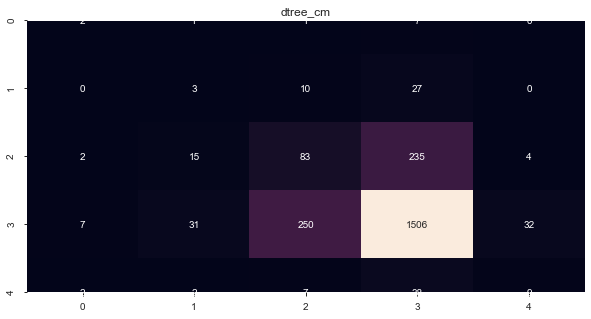

In [55]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

In [57]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

SVM_regressor_accuracy: 0.8034300791556728


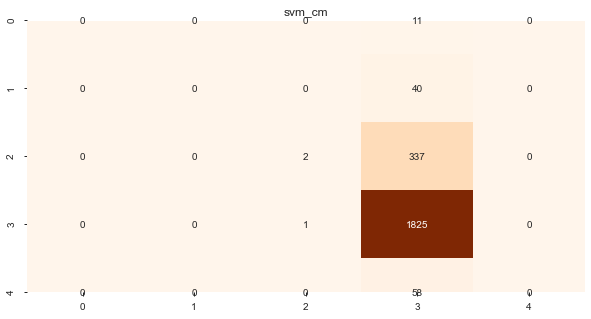

In [58]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

In [59]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=30)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

RandomForest_accuracy: 0.7559366754617414


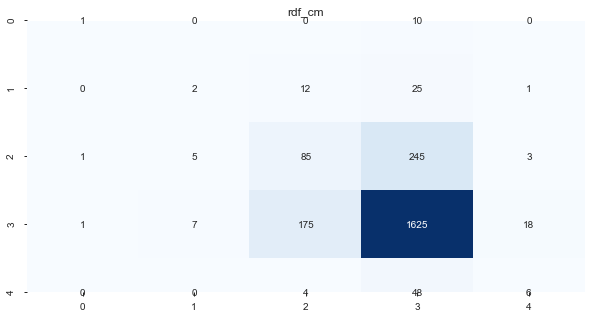

In [60]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
import xgboost as xgb

In [63]:
from xgboost import XGBClassifier

In [64]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.99%


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7726473175021987


Text(0.5, 1.0, 'Model Accracy')

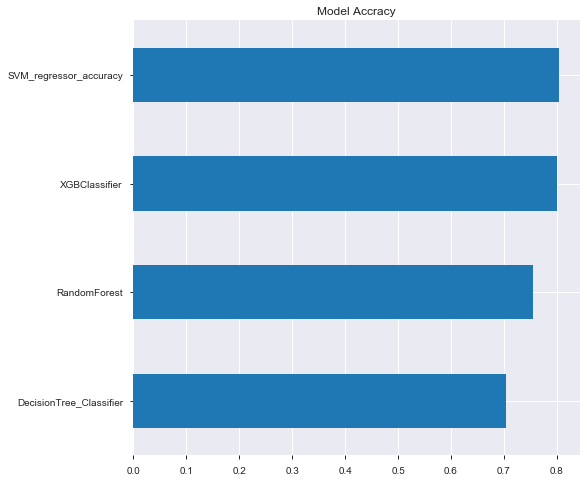

In [66]:
#Models comparision
%matplotlib inline
model_accuracy = pd.Series(data=[dtree_ac,svr_ac,rdf_ac,accuracy], 
        index=['DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest','XGBClassifier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')